# Telco Customer Churn Prediction

# Table of Contents
1. [Problem Definition](#Problem-Definition)
2. [Importing Basic Libraries](#Importing-Basic-Libraries)
3. [Loading Dataset](#Loading-Dataset)
4. [EDA (Exploratory Data Analysis) and Feature Engineering](#Exploratory-Data-Analysis-and-Feature-Engineering)
5. [Model Training and Evaluation](#Model-Training-and-Evaluation)
6. [Conclusion](#Conclusion)

# Problem Definition

Customer churn is a significant challenge for telecom companies, impacting revenue and long-term business sustainability. The goal of this project is to build a machine learning model that predicts whether a customer will churn (leave the service) based on demographic, service-related, and account information. By leveraging this predictive capability, telecom companies can proactively retain customers by identifying at-risk users and implementing targeted retention strategies.

# Importing Basic Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Loading Dataset

[Telco Customer Churn Dataset on Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [49]:
df = pd.read_csv('Telco-Customer-Churn.csv')

### Features:
The dataset includes the following key columns: 

1. **customerID** – Unique identifier for each customer.  
2. **gender** – Gender of the customer (Male/Female).  
3. **SeniorCitizen** – Indicates if the customer is a senior citizen (1: Yes, 0: No).  
4. **Partner** – Whether the customer has a partner (Yes/No).  
5. **Dependents** – Whether the customer has dependents (Yes/No).  
6. **tenure** – Number of months the customer has stayed with the company.  
7. **PhoneService** – Whether the customer has a phone service (Yes/No).  
8. **MultipleLines** – Whether the customer has multiple phone lines (Yes/No/No phone service).  
9. **InternetService** – Type of internet service (DSL, Fiber optic, No).  
10. **OnlineSecurity** – Whether the customer has online security service (Yes/No/No internet service).  
11. **OnlineBackup** – Whether the customer has an online backup service (Yes/No/No internet service).  
12. **DeviceProtection** – Whether the customer has device protection (Yes/No/No internet service).  
13. **TechSupport** – Whether the customer has tech support service (Yes/No/No internet service).  
14. **StreamingTV** – Whether the customer has a streaming TV service (Yes/No/No internet service).  
15. **StreamingMovies** – Whether the customer has a streaming movies service (Yes/No/No internet service).  
16. **Contract** – The type of contract the customer has (Month-to-month, One year, Two years).  
17. **PaperlessBilling** – Whether the customer is using paperless billing (Yes/No).  
18. **PaymentMethod** – The method used for bill payment (Electronic check, Mailed check, Bank transfer, Credit card).  
19. **MonthlyCharges** – The monthly amount charged to the customer.  
20. **TotalCharges** – The total amount charged to the customer.  
21. **Churn** – Target variable indicating if the customer churned (Yes/No).  


# Exploratory Data Analysis and Feature Engineering

### Data Summary

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [51]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [52]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The TotalCharges column being of type object suggests that there might be some non-numeric values in that column, such as empty strings, spaces, or improperly formatted data that is preventing it from being interpreted as a numeric type.

In [53]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].dtype)

float64


In [54]:
for feature in df.select_dtypes(include=['object', 'category']).columns:
    print(f"Unique values in {feature}: {df[feature].unique()}")

Unique values in customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in gender: ['Female' 'Male']
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values in Contract: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank t

The **customerID** feature is essentially an identifier for each customer, and it does not contain any predictive information about whether a customer will churn or not. As a result, it should not be used as a feature for predicting churn because it doesn’t provide any useful insights into the behavior or characteristics of the customer.

In [55]:
df = df.drop(columns='customerID')

### Checking And Removing Duplicates

In [56]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicate rows (if any)
df = df.drop_duplicates()
print(f"Shape of dataframe after removing duplicates: {df.shape}")

Number of duplicate rows: 22
Shape of dataframe after removing duplicates: (7021, 20)


### Handling Missing Values

In [57]:
missing_values = df.isnull().sum()
print(missing_values)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [58]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

### Detecting and Handling Outliers

In [59]:
from scipy.stats import zscore

def detect_outliers_zscore(column, threshold=3):
    z_scores = zscore(column, nan_policy='omit')  # Avoid NaN issues
    outliers = column[np.abs(z_scores) > threshold]
    return outliers

outlier_counts = {}

numeric_columns = df.select_dtypes(include=['number']).columns

for column in numeric_columns:
    outliers = detect_outliers_zscore(df[column])
    outlier_counts[column] = len(outliers)
    print(f"Number of outliers in {column}: {len(outliers)}")

for column, count in outlier_counts.items():
    if count > 0:
        print(f"Outliers in {column}: {detect_outliers_zscore(df[column]).values}")

Number of outliers in SeniorCitizen: 0
Number of outliers in tenure: 0
Number of outliers in MonthlyCharges: 0
Number of outliers in TotalCharges: 0


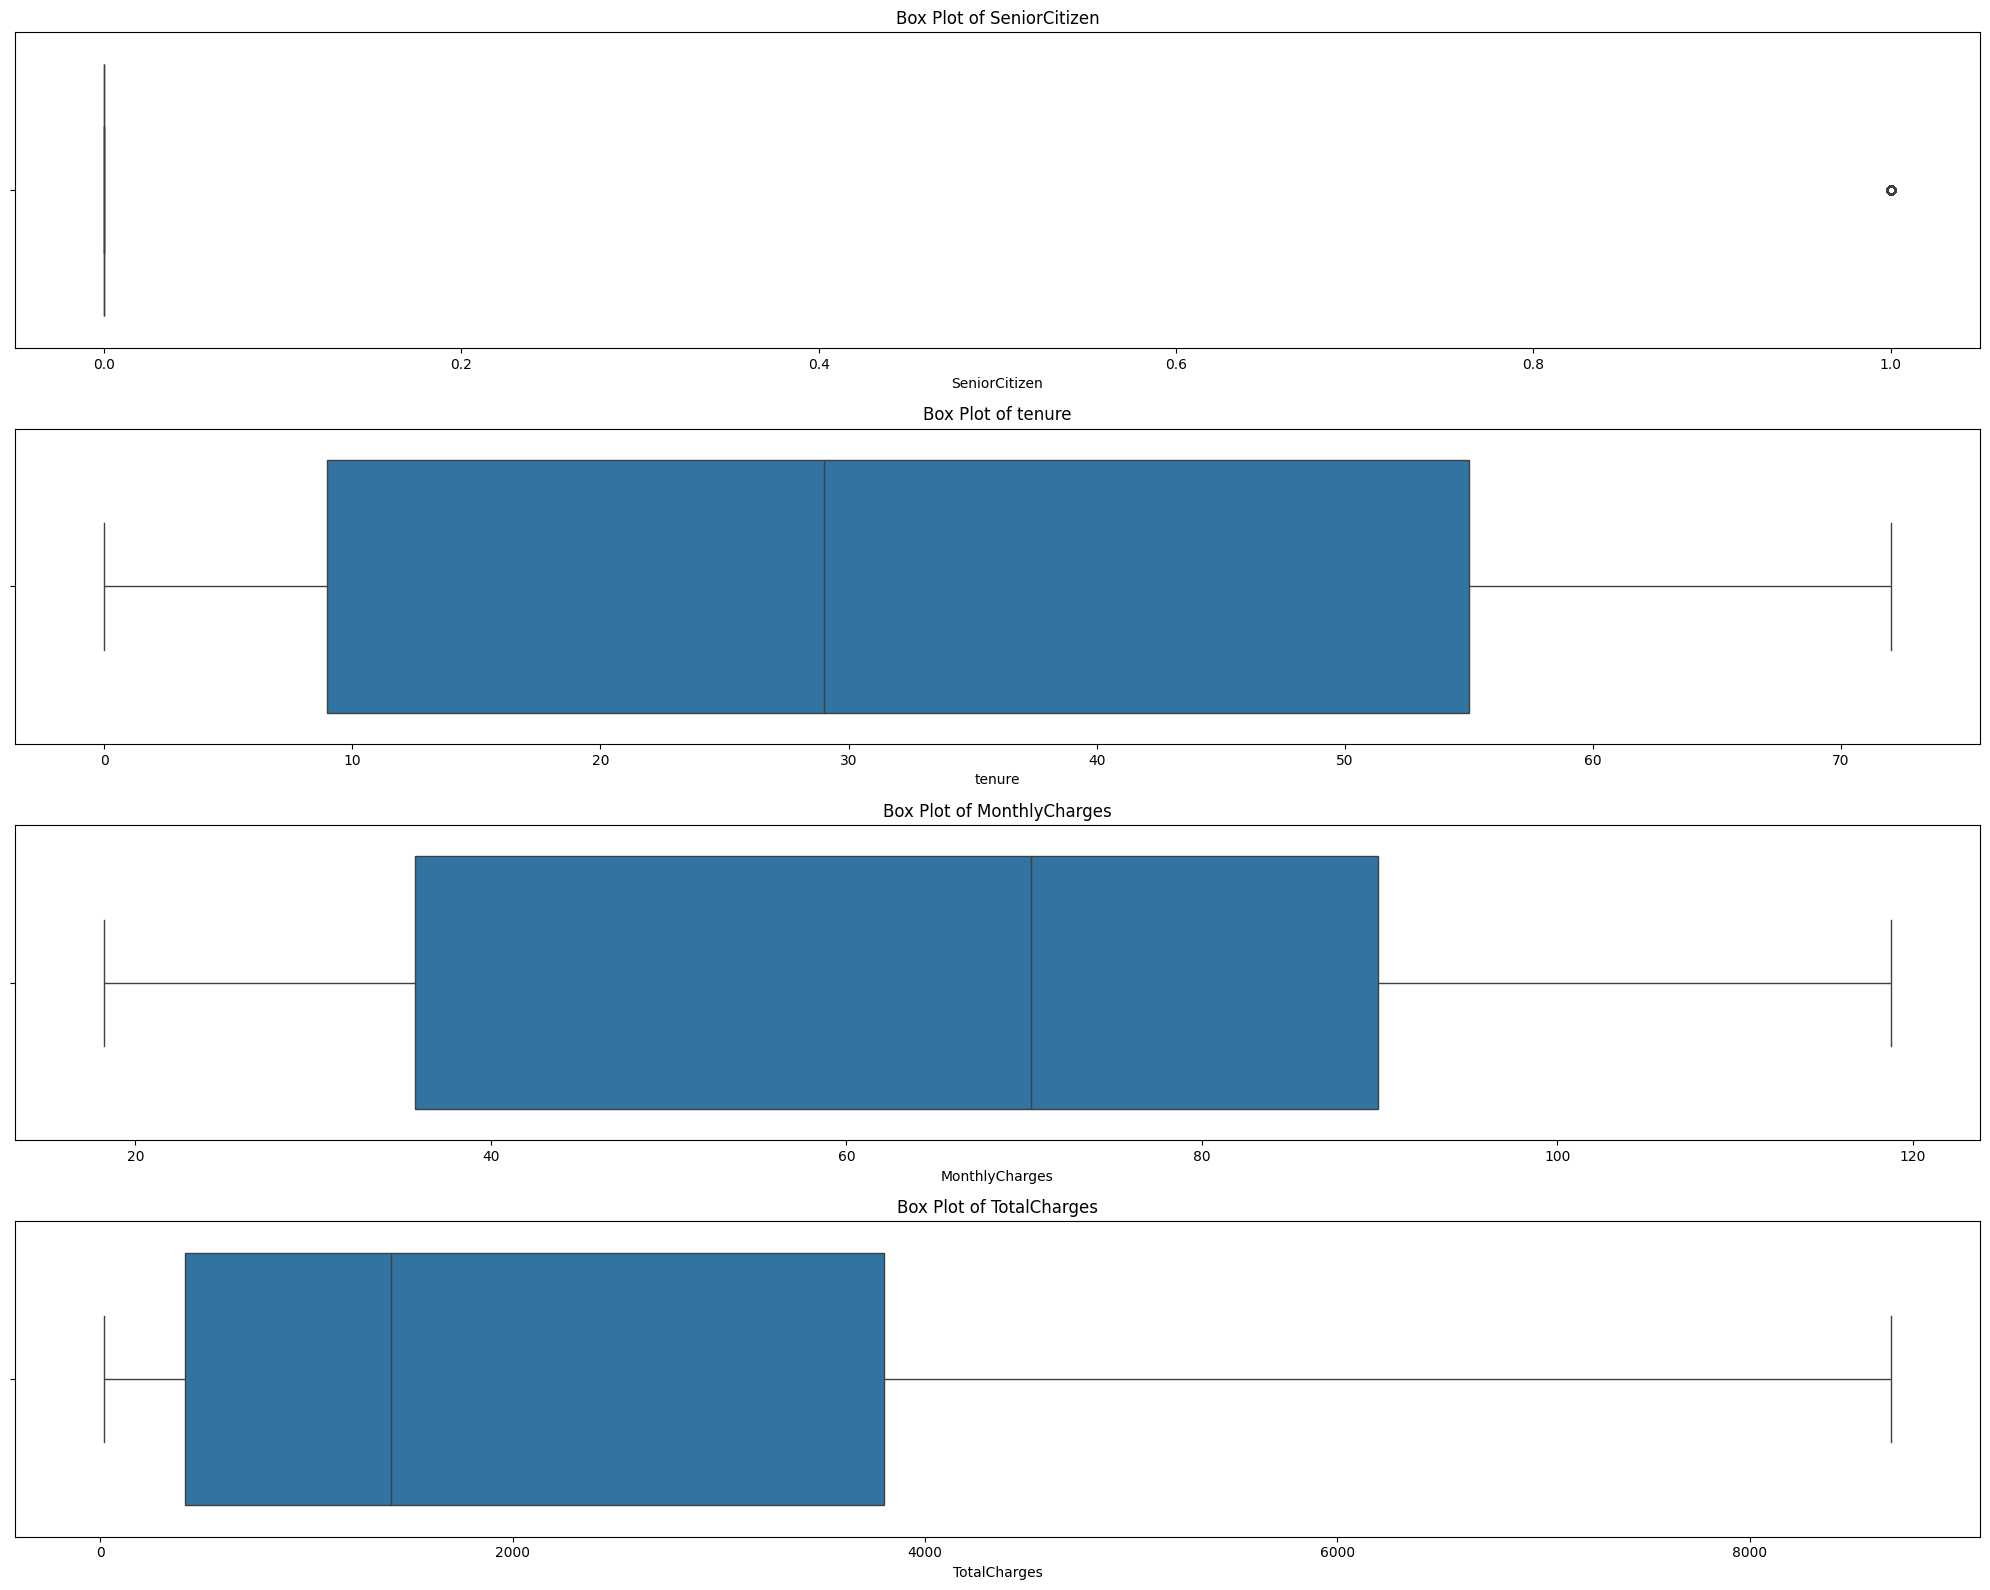

In [60]:
plt.figure(figsize=(20, len(numeric_columns) * 4))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

### Analyzing the Distribution of Features

In [61]:
features = df.drop('Churn', axis=1)
target = df['Churn']

numerical_features = features.select_dtypes(include=['number'])
categorical_features = features.select_dtypes(exclude=['number'])

df_churn_1 = df[df['Churn'] == 'Yes']
df_churn_0 = df[df['Churn'] == 'No']

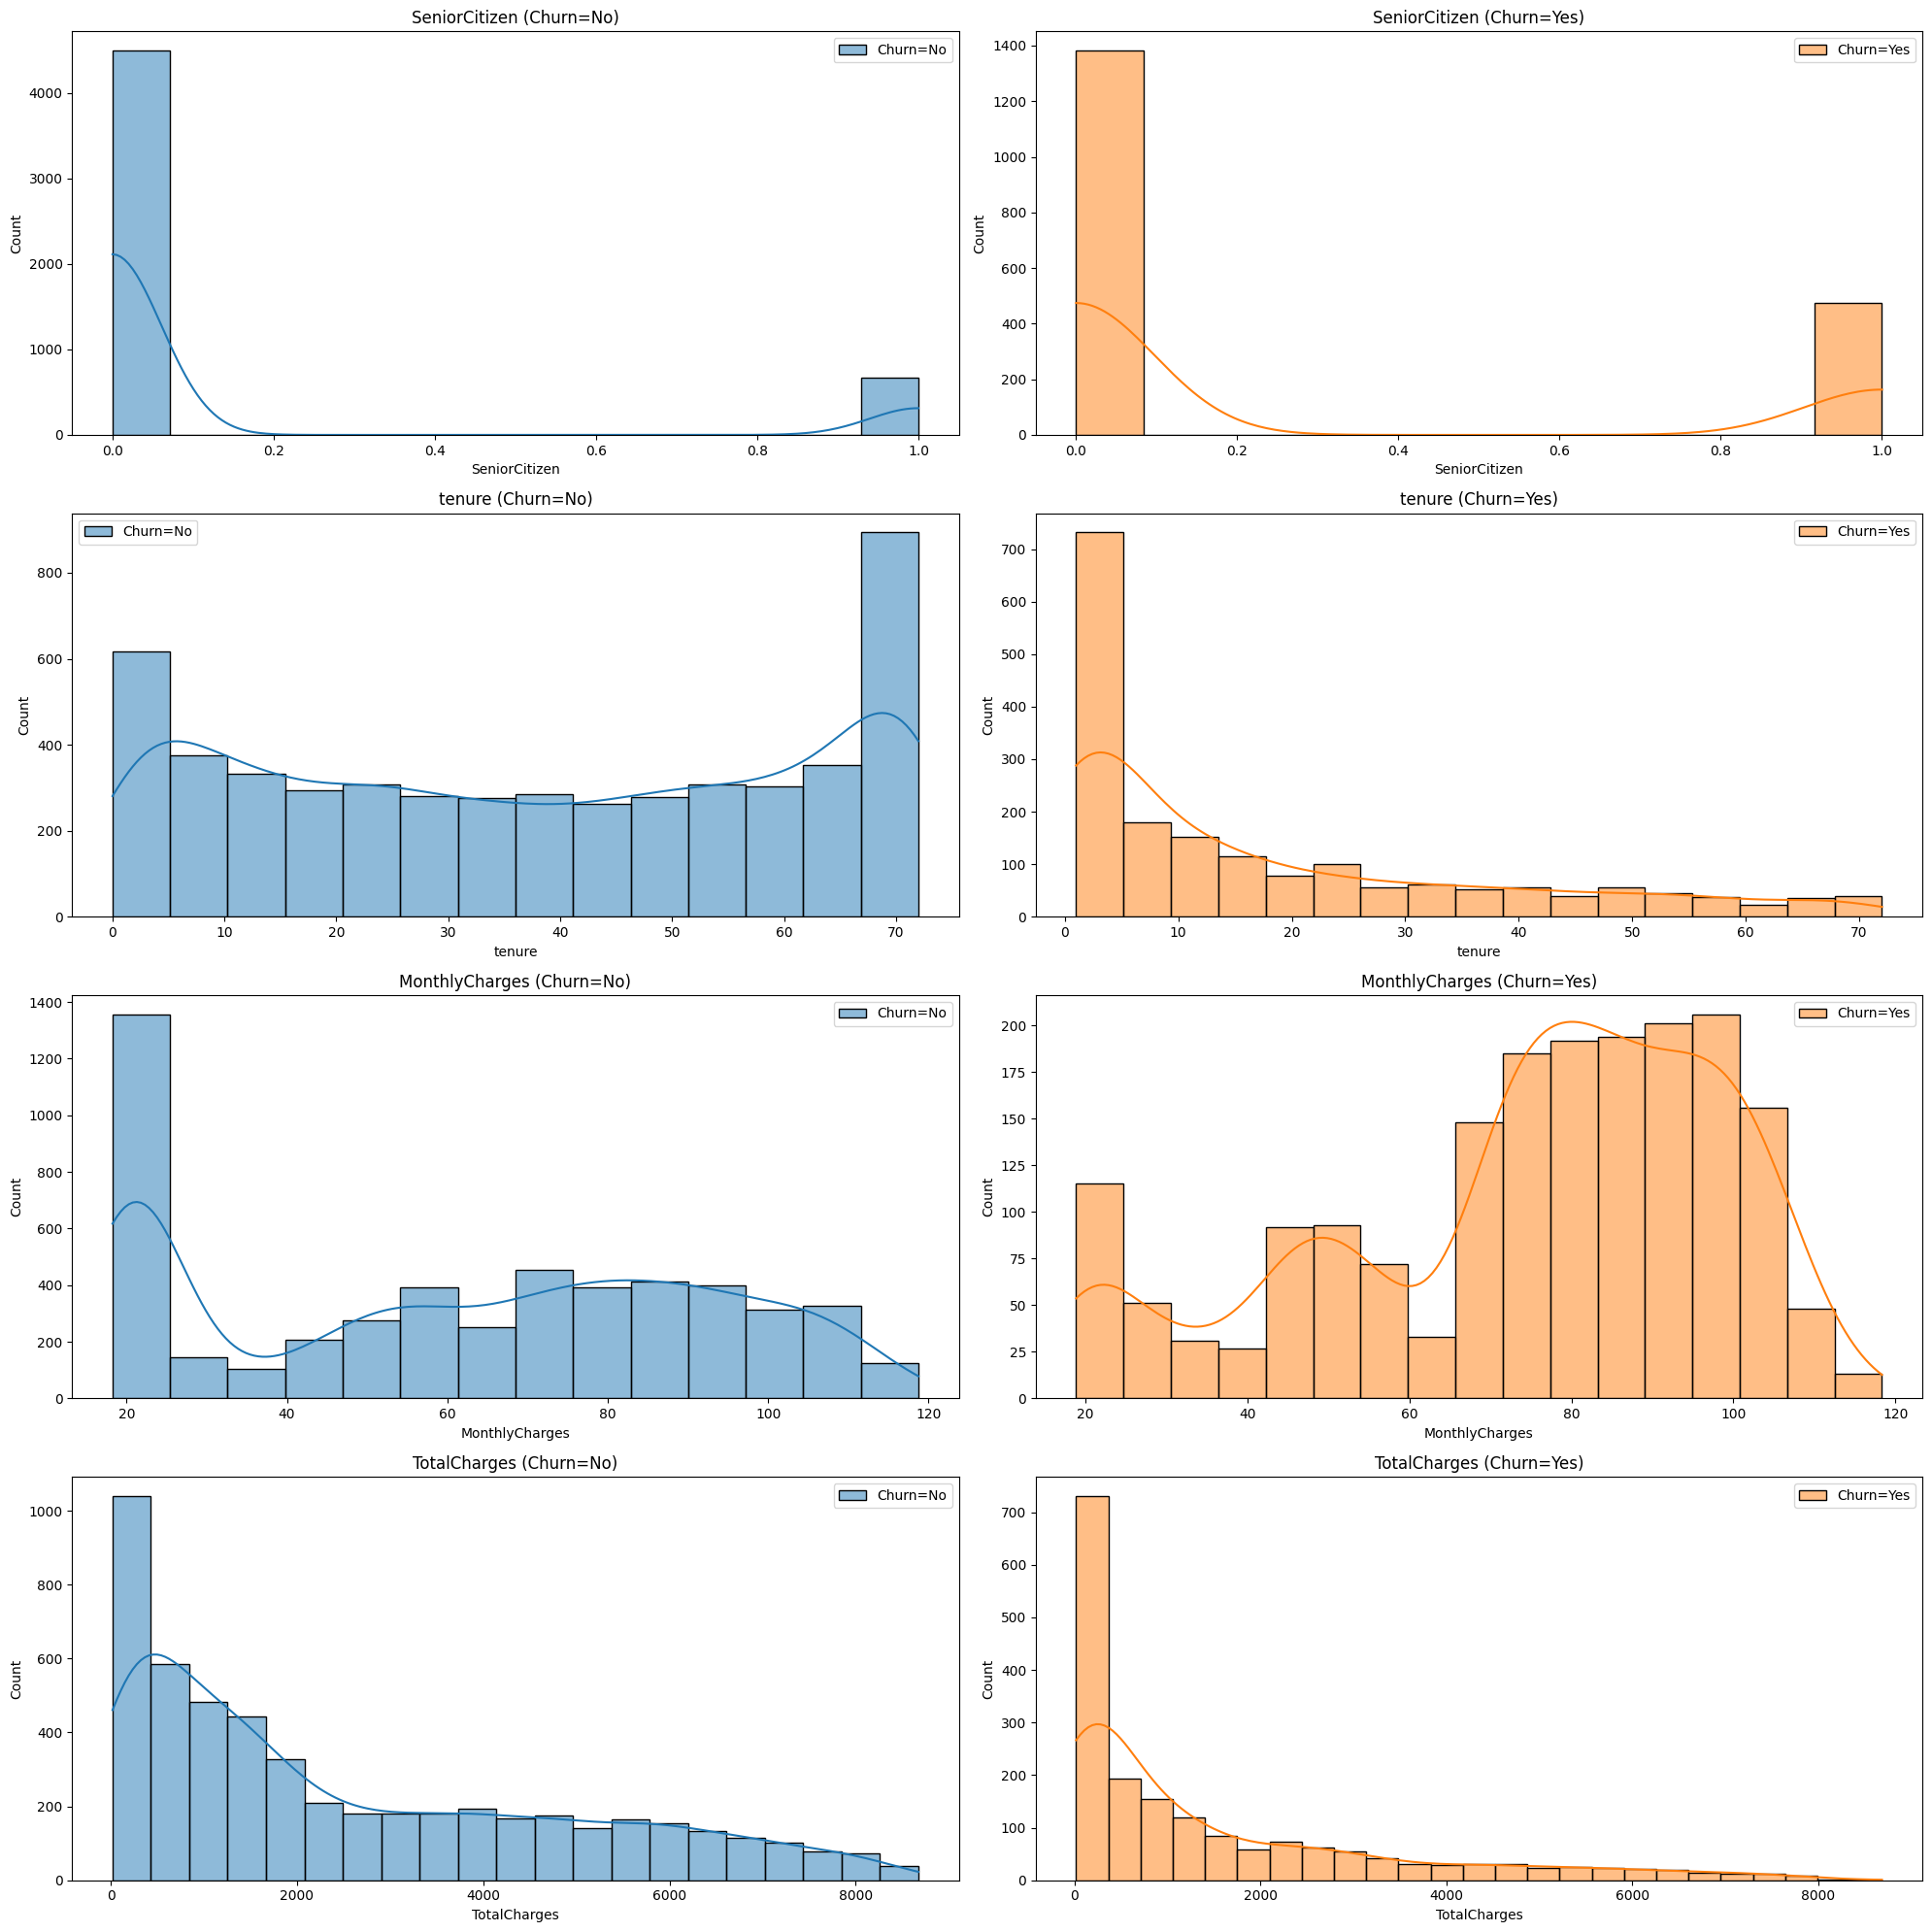

In [62]:
plt.figure(figsize=(20, 20))

numerical_features = features.select_dtypes(include=['number'])
for i, column in enumerate(numerical_features.columns, 1):
    plt.subplot(len(numerical_features.columns), 2, 2*i-1)  # Odd positions for Churn=0
    sns.histplot(df_churn_0[column], kde=True, color='C0', label='Churn=No')
    plt.title(f'{column} (Churn=No)')
    plt.legend()
    
    plt.subplot(len(numerical_features.columns), 2, 2*i)  # Even positions for Churn=1
    sns.histplot(df_churn_1[column], kde=True, color='C1', label='Churn=Yes')
    plt.title(f'{column} (Churn=Yes)')
    plt.legend()

plt.tight_layout()
plt.show()

In [63]:
skewness = numerical_features.skew()
print("Skewness of Features:")
print(skewness)

Skewness of Features:
SeniorCitizen     1.829987
tenure            0.235542
MonthlyCharges   -0.224097
TotalCharges      0.959073
dtype: float64


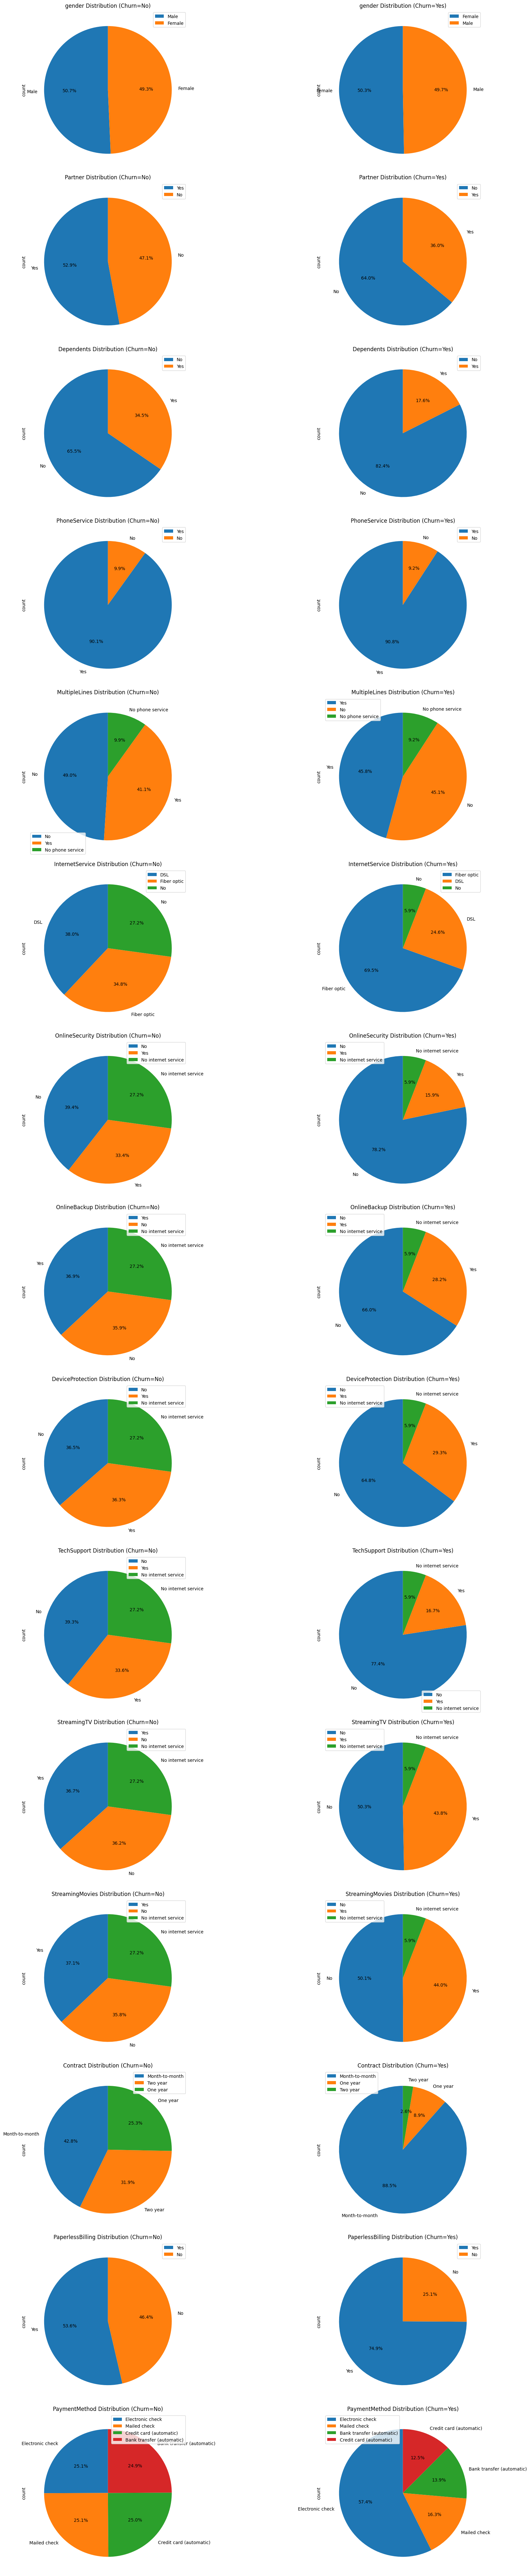

In [64]:
plt.figure(figsize=(20, 80))

for i, column in enumerate(categorical_features.columns, 1):
    plt.subplot(len(categorical_features.columns), 2, 2*i-1)  # Odd positions for Churn=0
    churn_0_counts = df_churn_0[column].value_counts()
    churn_0_counts.plot.pie(autopct='%1.1f%%', colors=['C0', 'C1', 'C2','C3'], startangle=90, ax=plt.gca(), legend=True)
    plt.title(f'{column} Distribution (Churn=No)')

    plt.subplot(len(categorical_features.columns), 2, 2*i)  # Even positions for Churn=1
    churn_1_counts = df_churn_1[column].value_counts()
    churn_1_counts.plot.pie(autopct='%1.1f%%', colors=['C0', 'C1', 'C2','C3'], startangle=90, ax=plt.gca(), legend=True)
    plt.title(f'{column} Distribution (Churn=Yes)')

plt.tight_layout()
plt.show()

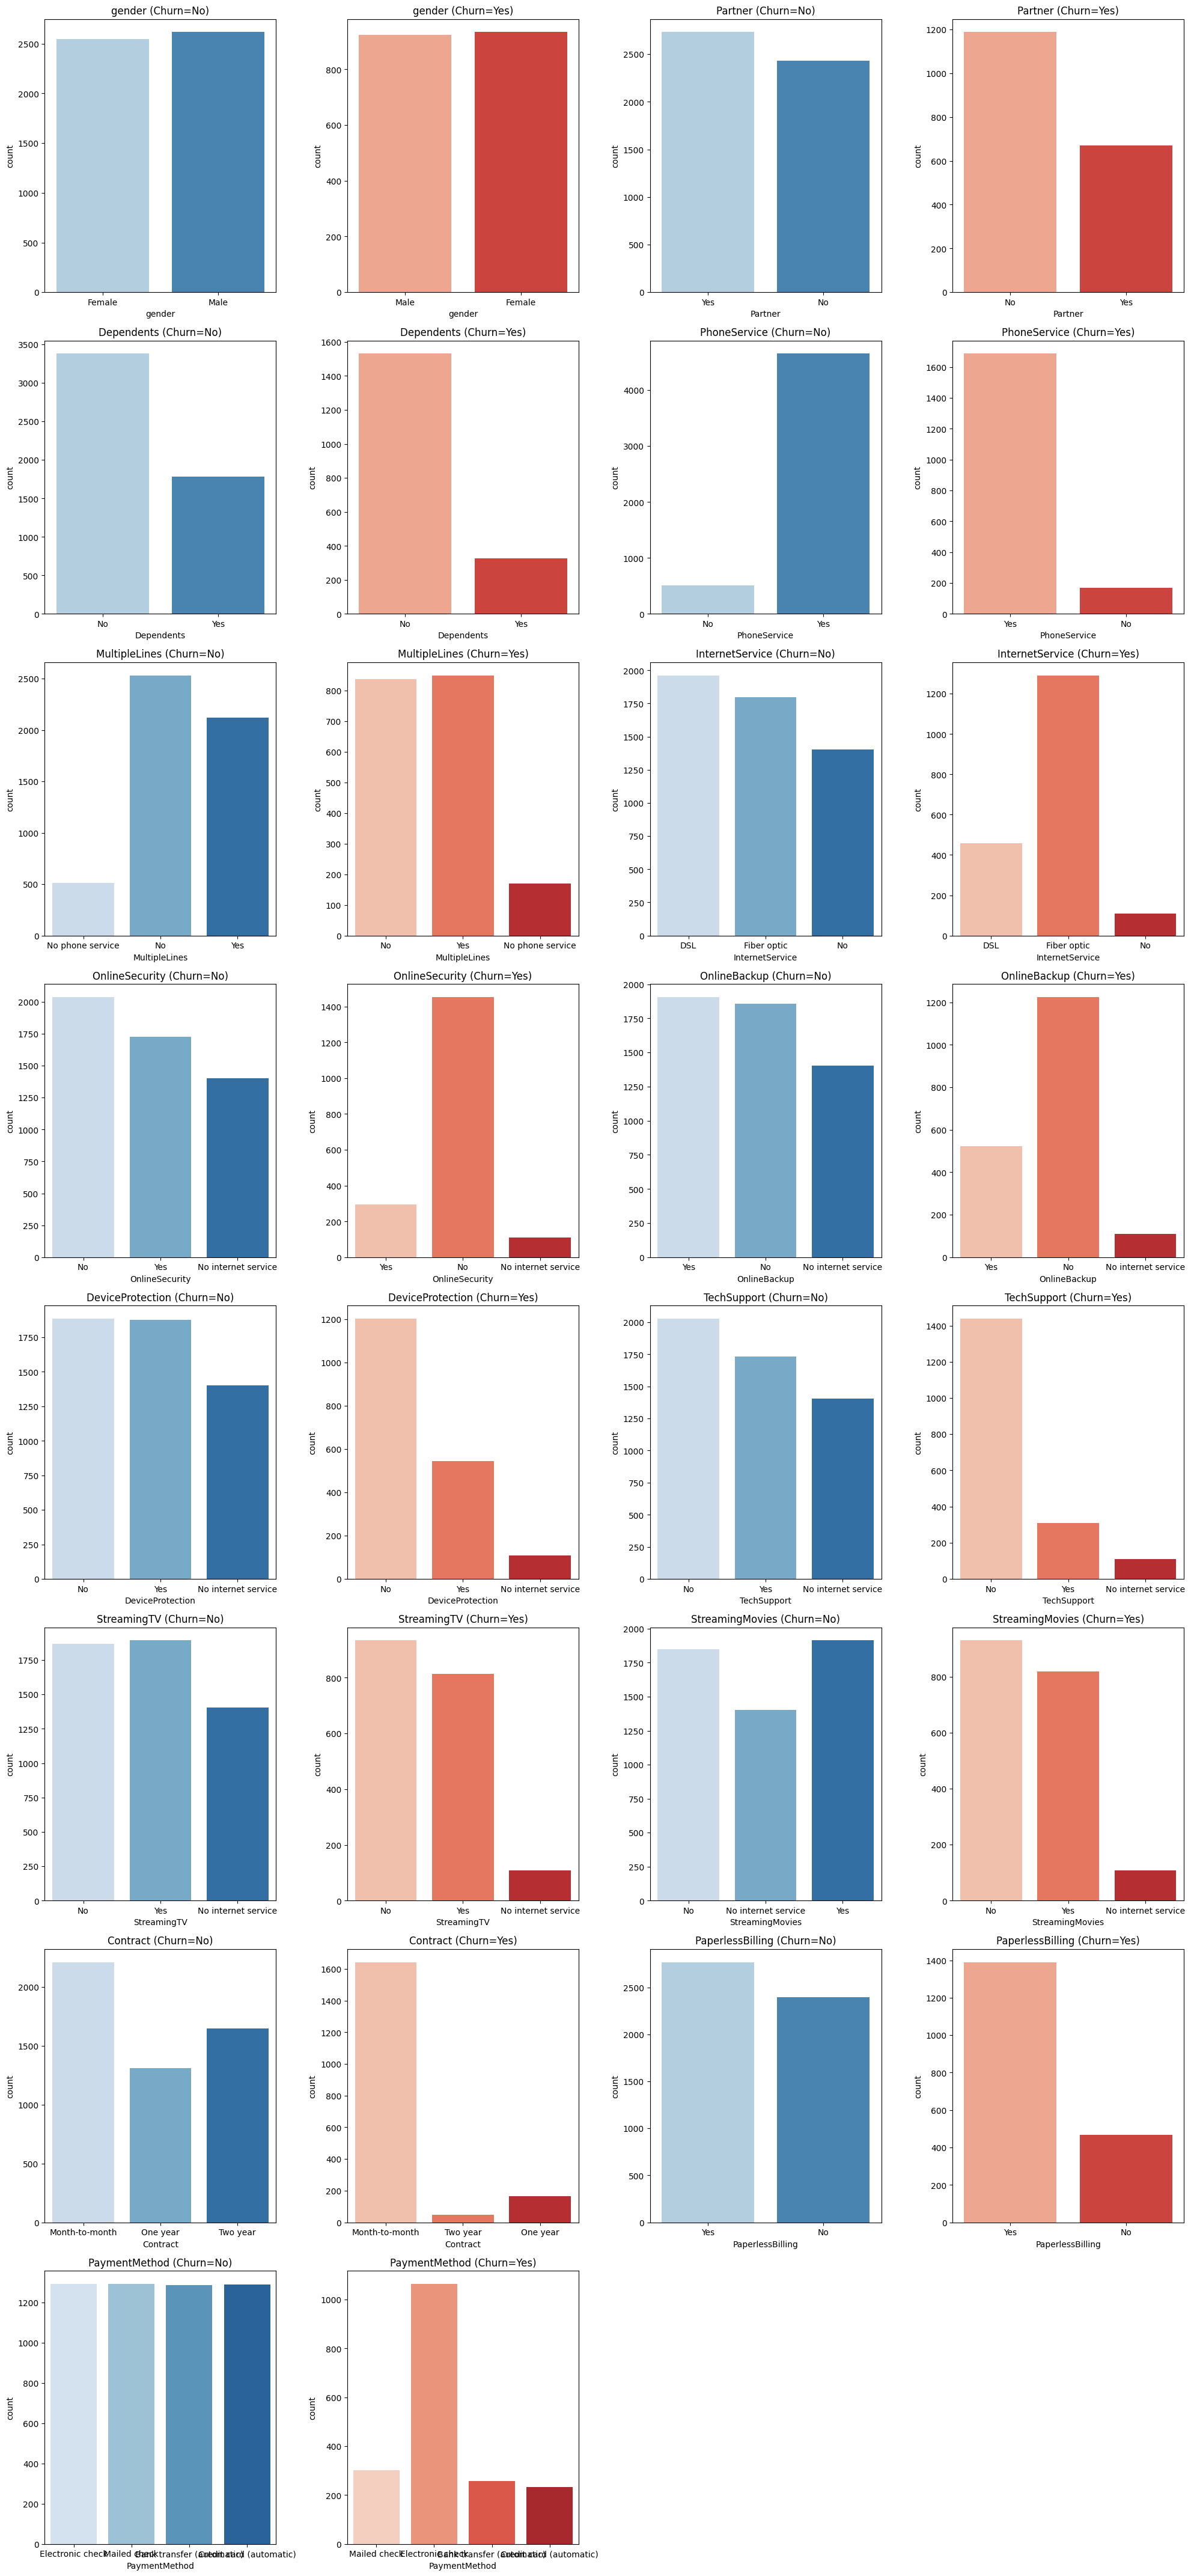

In [65]:
plt.figure(figsize=(20, 80))

for i, column in enumerate(categorical_features.columns, 1):
    plt.subplot(len(categorical_features.columns), 4, 2*i-1)  # Odd positions for Churn=0
    sns.countplot(data=df_churn_0, x=column, palette='Blues')
    plt.title(f'{column} (Churn=No)')

    plt.subplot(len(categorical_features.columns), 4, 2*i)  # Even positions for Churn=1
    sns.countplot(data=df_churn_1, x=column, palette='Reds')
    plt.title(f'{column} (Churn=Yes)')

plt.tight_layout()
plt.show()

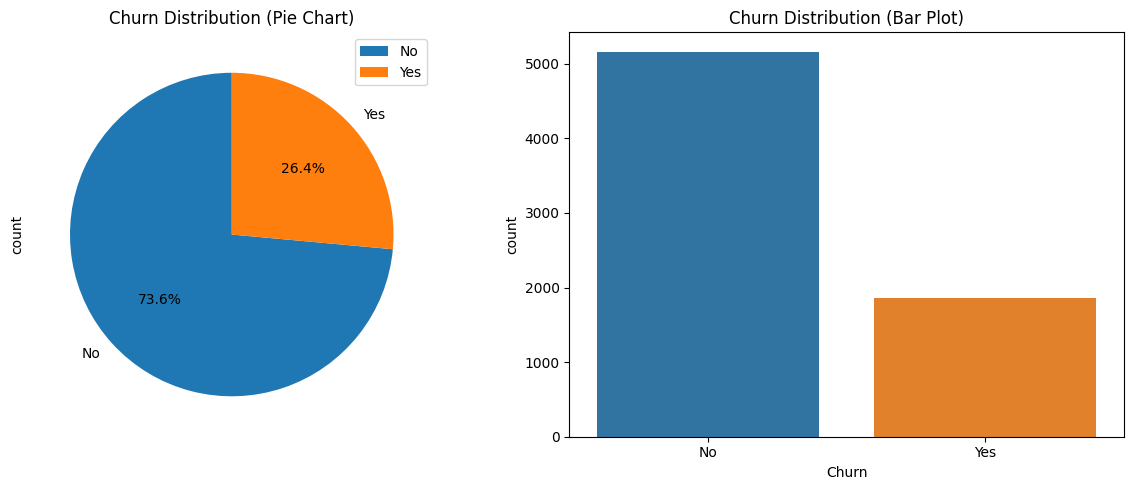

In [66]:
plt.figure(figsize=(12, 5))

# Pie Chart
plt.subplot(1, 2, 1)
target.value_counts().plot.pie(autopct='%1.1f%%', colors=['C0', 'C1'], startangle=90, legend=True)
plt.title('Churn Distribution (Pie Chart)')

# Bar Plot
plt.subplot(1, 2, 2)
sns.countplot(x=target, palette=['C0', 'C1'])
plt.title('Churn Distribution (Bar Plot)')

plt.tight_layout()
plt.show()

The target variable is imbalanced and we will use **class weighting** technique to handle that.

### Encoding Categorical Features

Label Encoding is applied to the ordinal features (SeniorCitizen, Contract) and the target variable (Churn).

One-Hot Encoding is applied to all nominal features (like gender, Partner, etc.).

In [67]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding for 'Churn', 'SeniorCitizen', and 'Contract'
df['Churn'] = label_encoder.fit_transform(df['Churn'])  # 'Yes' -> 1, 'No' -> 0
df['SeniorCitizen'] = label_encoder.fit_transform(df['SeniorCitizen'])  # 0 or 1
df['Contract'] = label_encoder.fit_transform(df['Contract'])  # (we'll order 'Month-to-month' < 'One year' < 'Two years')

# Apply one-hot encoding for nominal categorical columns
df = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                                 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'],
                    drop_first=True)  # drop_first to avoid multicollinearity

df.head()

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,29.85,29.85,0,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,1,56.95,1889.50,0,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,0,2,0,53.85,108.15,1,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,0,45,1,42.30,1840.75,0,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,0,2,0,70.70,151.65,1,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


### Relation of features

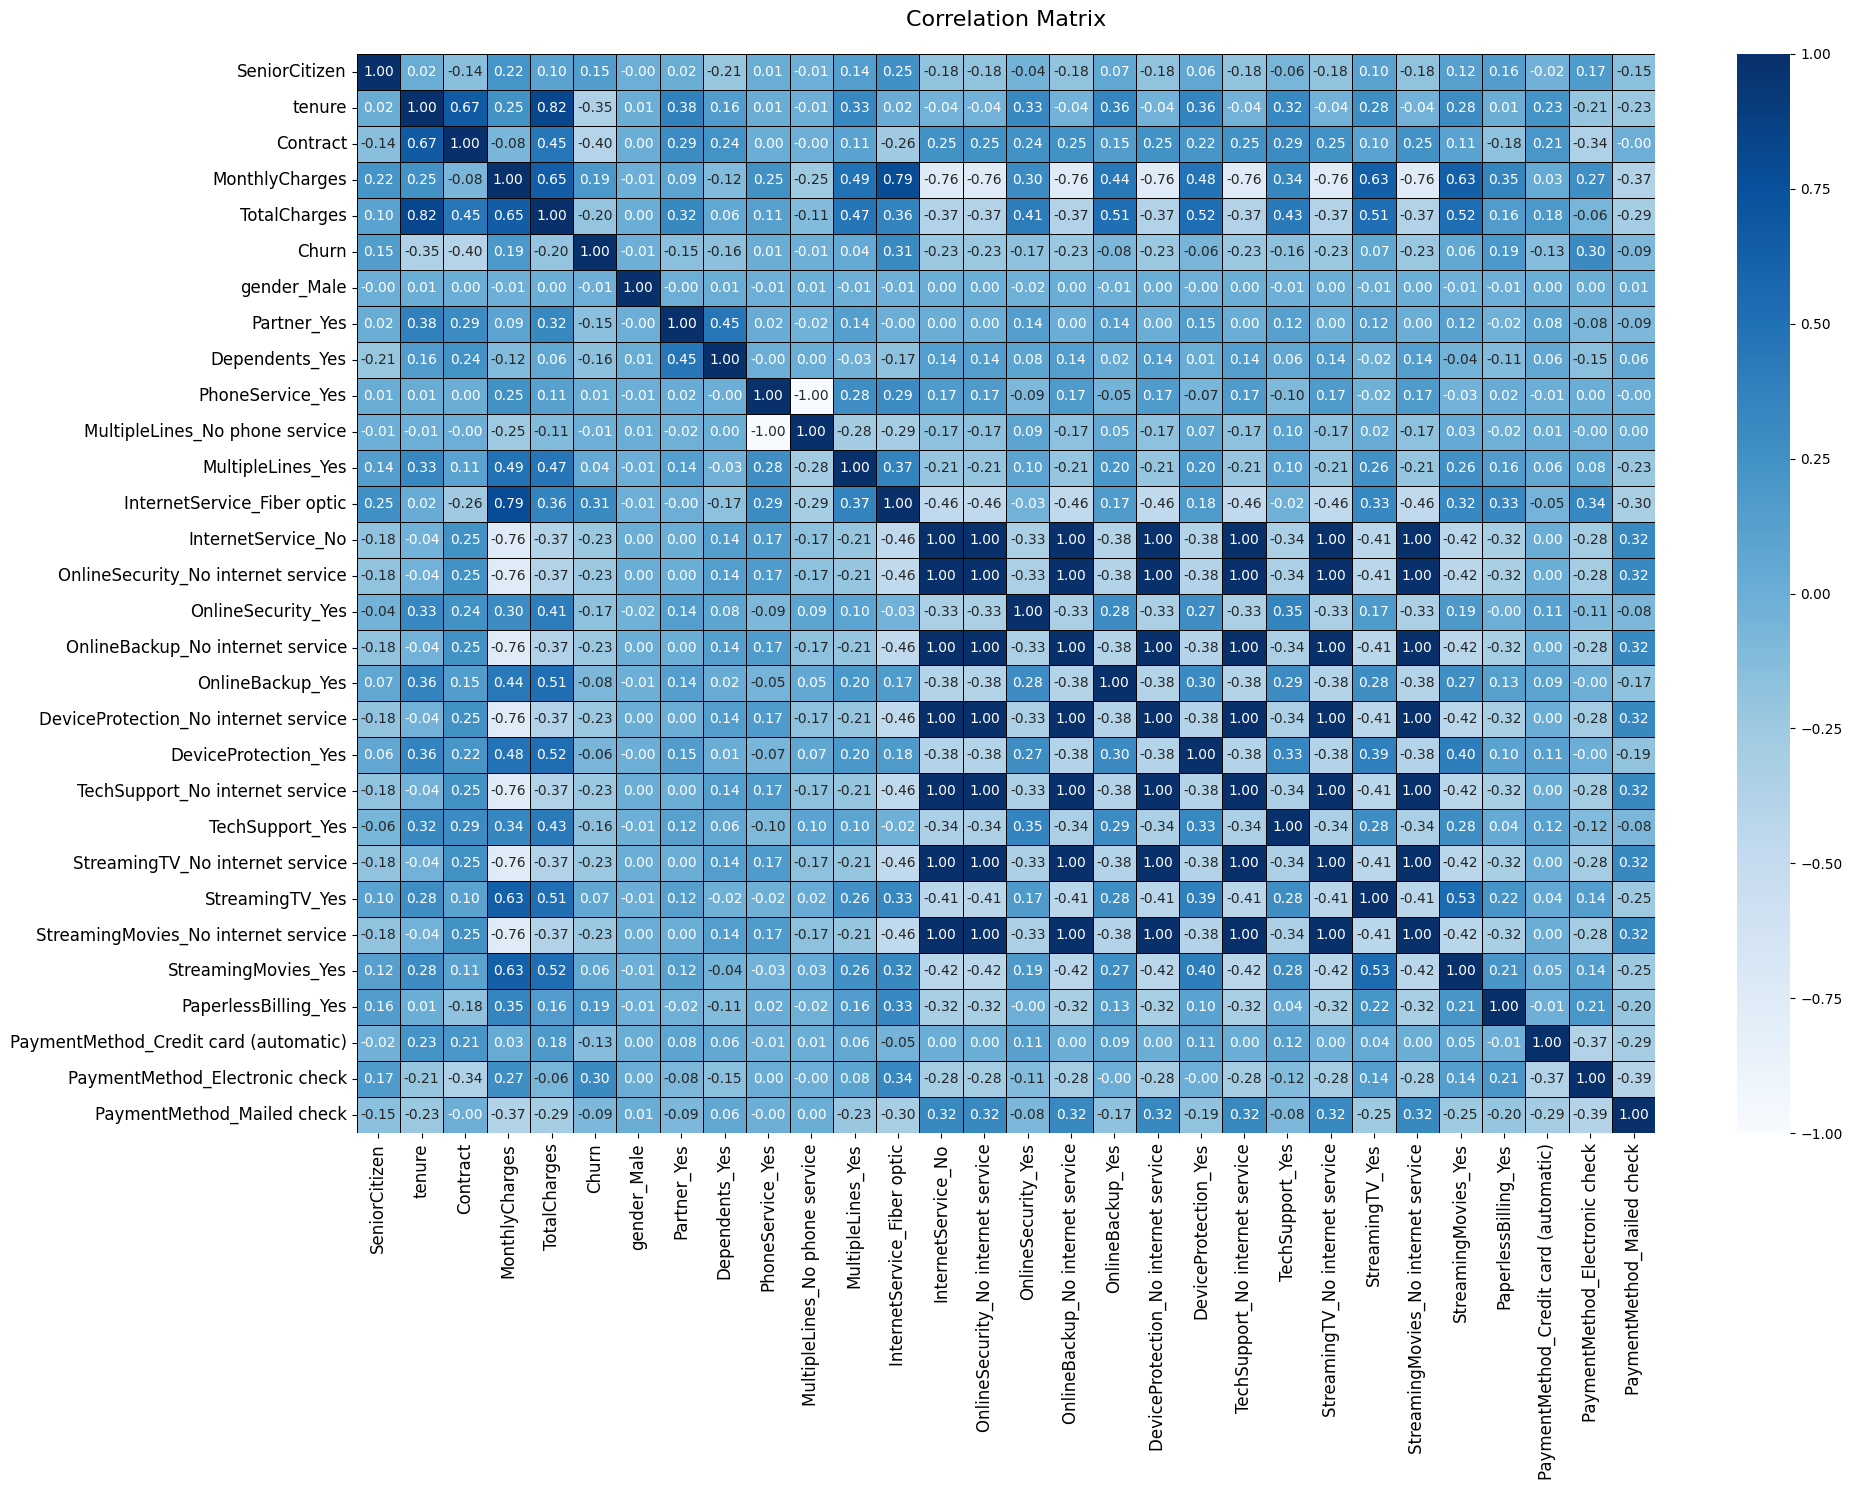

In [68]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 15))

sns.heatmap(
    correlation_matrix, 
    annot=True,
    fmt=".2f",
    cmap='Blues',
    vmin=-1,
    vmax=1,
    linewidths=0.7,
    linecolor='black'
)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Matrix', fontsize=16, pad=20)

plt.tight_layout()
plt.show()

We perform feature selection by removing features that are highly correlated with each other. Multicollinearity can introduce noise into the model, leading to less accurate predictions. Therefore, we identify features that are correlated above a certain threshold and remove one of the correlated features while keeping the one that has the highest correlation with the target variable.

In [69]:
correlation_matrix = df.corr()

target_correlation = correlation_matrix['Churn'].drop('Churn')

# Get the list of features with correlation higher than 0.8 or lower than -0.8
high_corr_features = set()

for feature in correlation_matrix.columns:
    for other_feature in correlation_matrix.columns:
        if feature != other_feature and abs(correlation_matrix[feature][other_feature]) > 0.8:
            # Keep the feature that has higher correlation with target
            if abs(target_correlation[feature]) > abs(target_correlation[other_feature]):
                high_corr_features.add(other_feature)
            else:
                high_corr_features.add(feature)

# Drop the highly correlated features from the dataset
df_reduced = df.drop(columns=high_corr_features)

# Show the reduced dataset
df_reduced.head()

,SeniorCitizen,tenure,Contract,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,29.85,0,False,True,False,True,False,...,False,True,False,False,False,False,True,False,True,False
1,0,34,1,56.95,0,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2,0,2,0,53.85,1,True,False,False,False,False,...,True,True,False,False,False,False,True,False,False,True
3,0,45,1,42.30,0,True,False,False,True,False,...,True,False,True,True,False,False,False,False,False,False
4,0,2,0,70.70,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [70]:
df = df_reduced

### Feature Scaling and Final Data Preparation

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['Churn'], axis=1)
y = df['Churn']

# training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Print shapes to verify
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (5616, 20) (5616,)
Test set shape: (1405, 20) (1405,)


# Model Training and Evaluation

In [170]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {
    'scale_pos_weight': [1.5, 1.75, 2],
    'reg_lambda': [1, 2, 3],
    'min_child_weight': [5, 10, 15],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

lgb_model = lgb.LGBMClassifier(objective='binary', random_state=42, verbose=-1)

# Grid Search using cross-validation
grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    scoring='roc_auc',  # Optimize for ROC AUC score
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_auc = grid_search.best_score_

print("\nBest Parameters:", best_params)
print(f"Best Cross-Validation AUC Score: {best_auc:.4f}")

final_model = lgb.LGBMClassifier(
    objective='binary',
    random_state=42,
    verbose=-1,
    **best_params
)

final_model.fit(X_train, y_train)

y_test_pred = final_model.predict(X_test)
y_test_pred_proba = final_model.predict_proba(X_test)[:, 1]

# Evaluate on the test set
accuracy = accuracy_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Print test set results
print("\n=== Test Set Results ===")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test ROC AUC Score: {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 15, 'n_estimators': 100, 'reg_lambda': 3, 'scale_pos_weight': 1.5}
Best Cross-Validation AUC Score: 0.8489

=== Test Set Results ===
Test Accuracy: 0.7964
Test ROC AUC Score: 0.8433

Confusion Matrix:
[[883 150]
 [136 236]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1033
           1       0.61      0.63      0.62       372

    accuracy                           0.80      1405
   macro avg       0.74      0.74      0.74      1405
weighted avg       0.80      0.80      0.80      1405



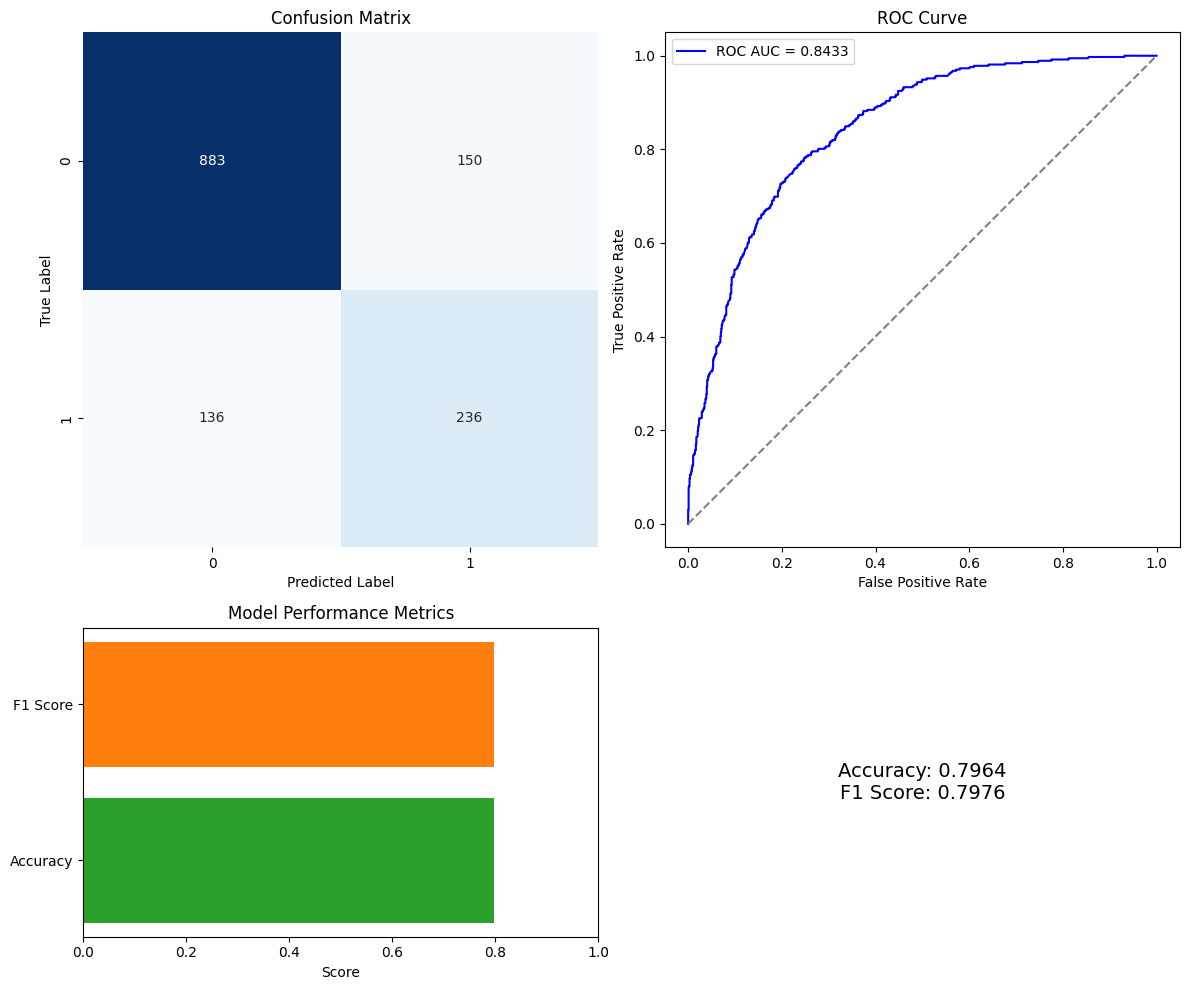

In [178]:
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_test_pred, average='weighted')

fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
fig, axes = plt.subplots(2, 2, figsize=(12, 10), gridspec_kw={'height_ratios': [1, 0.6]})

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0, 0])
axes[0, 0].set_title("Confusion Matrix")
axes[0, 0].set_xlabel("Predicted Label")
axes[0, 0].set_ylabel("True Label")

axes[0, 1].plot(fpr, tpr, color='blue', label=f"ROC AUC = {roc_auc:.4f}")
axes[0, 1].plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
axes[0, 1].set_title("ROC Curve")
axes[0, 1].set_xlabel("False Positive Rate")
axes[0, 1].set_ylabel("True Positive Rate")
axes[0, 1].legend()

axes[1, 0].barh(["Accuracy", "F1 Score"], [accuracy, f1], color=['C2', 'C1'])
axes[1, 0].set_xlim(0, 1)
axes[1, 0].set_title("Model Performance Metrics")
axes[1, 0].set_xlabel("Score")

axes[1, 1].axis("off")
axes[1, 1].text(0.5, 0.5, f"Accuracy: {accuracy:.4f}\nF1 Score: {f1:.4f}", ha='center', va='center', fontsize=14, color='black')

plt.tight_layout()
plt.show()

# Conclusion

In this project, we performed an extensive hyperparameter tuning for a LightGBM model using Grid Search with cross-validation. We tested 729 parameter combinations over 5 folds, which resulted in 3645 fits. 

Overall, the model is performing reasonably well for a binary classification problem with imbalanced data, showing a strong ROC AUC Score and acceptable performance in terms of Accuracy, Precision, and Recall. There's still room for improvement in terms of identifying churn customers, which can be further optimized with more advanced techniques like feature engineering or additional hyperparameter tuning.